In [1]:
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
import matplotlib.pyplot as plt
from IPython.display import Image,HTML
import json
import datetime
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from wordcloud import WordCloud,STOPWORDS
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")
sns.set(font_scale=1.25)
pd.set_option("display.max_colwidth",50)

In [2]:
df1=pd.read_csv("tmdb_5000_credits.csv")
df2=pd.read_csv("tmdb_5000_movies.csv")

In [3]:
df1.columns

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

In [4]:
df1.columns=["id","tittle","cast","crew"]
df2=df2.merge(df1,on="id")

In [5]:
df2.shape

(4803, 23)

In [6]:
df2.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'tittle', 'cast', 'crew'],
      dtype='object')

In [7]:
df2.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 23 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

In [9]:
df2[df2['original_title'] != df2['title']][['title', 'original_title']].head()

,title,original_title
97,Shin Godzilla,シン・ゴジラ
215,Fantastic 4: Rise of the Silver Surfer,4: Rise of the Silver Surfer
235,Asterix at the Olympic Games,Astérix aux Jeux Olympiques
317,The Flowers of War,金陵十三釵
474,Evolution,Évolution


In [10]:
df2=df2.drop("original_title",axis=1)

In [11]:
df2[df2["revenue"]==0].shape

(1427, 22)

In [12]:
df2["budget"]=pd.to_numeric(df2["budget"],errors="coerce")
df2["budget"]=df2["budget"].replace(0,np.nan)
df2[df2["budget"].isnull()].shape

(1037, 22)

In [13]:
df2["return"]=df2["revenue"]/df2["budget"]
df2[df2["return"].isnull()].shape

(1037, 23)

In [14]:
df2["production_countries"]

0       [{"iso_3166_1": "US", "name": "United States o...
1       [{"iso_3166_1": "US", "name": "United States o...
2       [{"iso_3166_1": "GB", "name": "United Kingdom"...
3       [{"iso_3166_1": "US", "name": "United States o...
4       [{"iso_3166_1": "US", "name": "United States o...
                              ...                        
4798    [{"iso_3166_1": "MX", "name": "Mexico"}, {"iso...
4799                                                   []
4800    [{"iso_3166_1": "US", "name": "United States o...
4801    [{"iso_3166_1": "US", "name": "United States o...
4802    [{"iso_3166_1": "US", "name": "United States o...
Name: production_countries, Length: 4803, dtype: object

In [15]:
df2["year"]=pd.to_datetime(df2["release_date"],errors="coerce").apply(lambda x:str(x).split('-')[0] if x!=np.nan else np.nan)

In [17]:
df2["title"]=df2["title"].astype("str")
df2["overview"]=df2["overview"].astype("str")

In [18]:
title_corpus=' '.join(df2["title"])
overview_corpus=' '.join(df2["overview"])

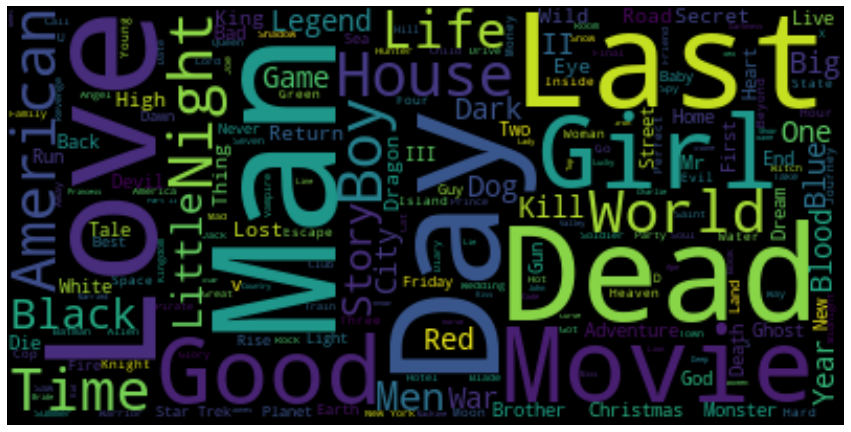

In [20]:
wordcloud=WordCloud().generate(title_corpus)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

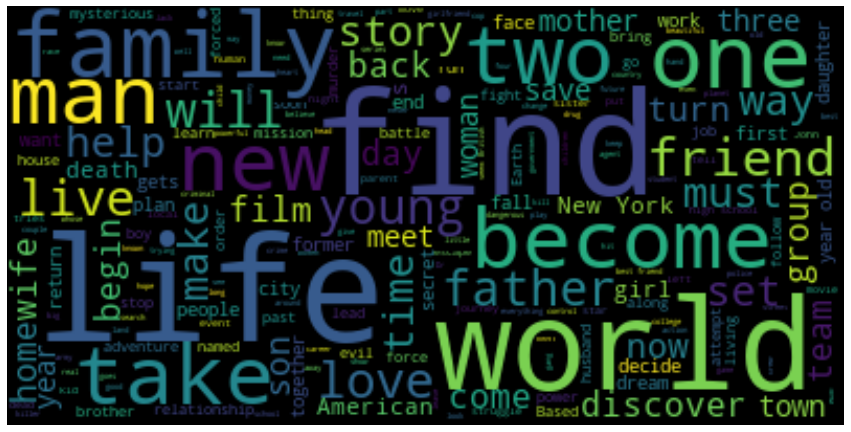

In [21]:
wordcloud=WordCloud().generate(overview_corpus)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

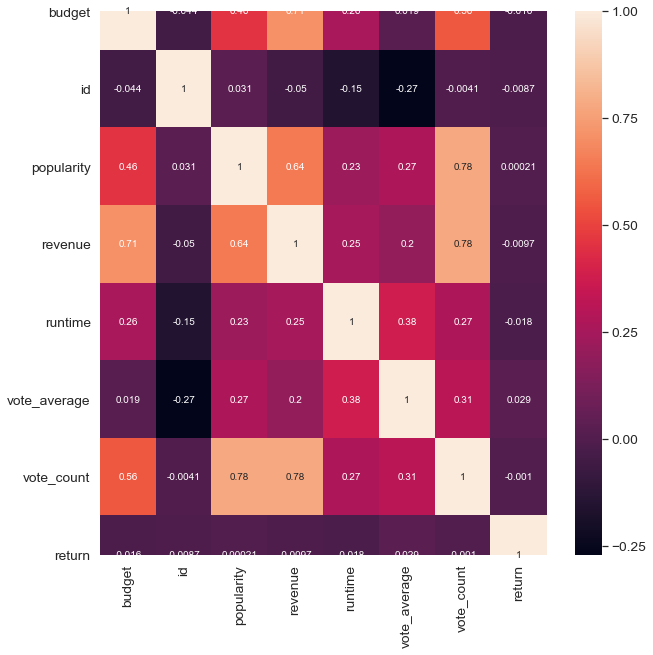

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(df2.corr(),annot=True)
plt.show()

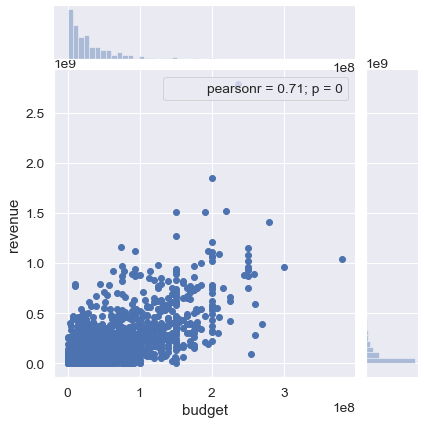

In [23]:
from scipy.stats import pearsonr
sns.jointplot(x="budget",y="revenue",stat_func=pearsonr,data=df2)

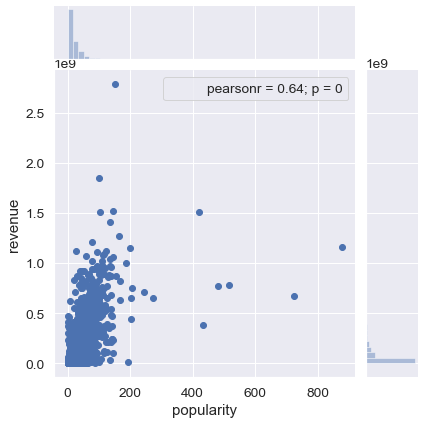

In [24]:
sns.jointplot(x="popularity",y="revenue",stat_func=pearsonr,data=df2)

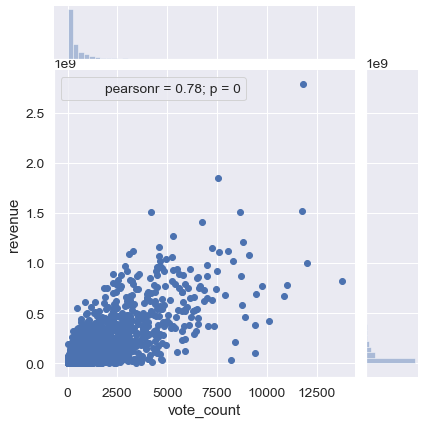

In [25]:
sns.jointplot(x="vote_count",y="revenue",stat_func=pearsonr,data=df2)

In [26]:
df2[["title","vote_count","year"]].sort_values("vote_count",ascending=False).head(10)

,title,vote_count,year
96,Inception,13752,2010
65,The Dark Knight,12002,2008
0,Avatar,11800,2009
16,The Avengers,11776,2012
788,Deadpool,10995,2016
95,Interstellar,10867,2014
287,Django Unchained,10099,2012
94,Guardians of the Galaxy,9742,2014
426,The Hunger Games,9455,2012
127,Mad Max: Fury Road,9427,2015


In [27]:
most_popular_movies_and_return=df2[["title","vote_count","year","revenue","return"]].sort_values("vote_count",ascending=False)

In [28]:
most_popular_movies_and_return=most_popular_movies_and_return [most_popular_movies_and_return["revenue"]>=1000000000]

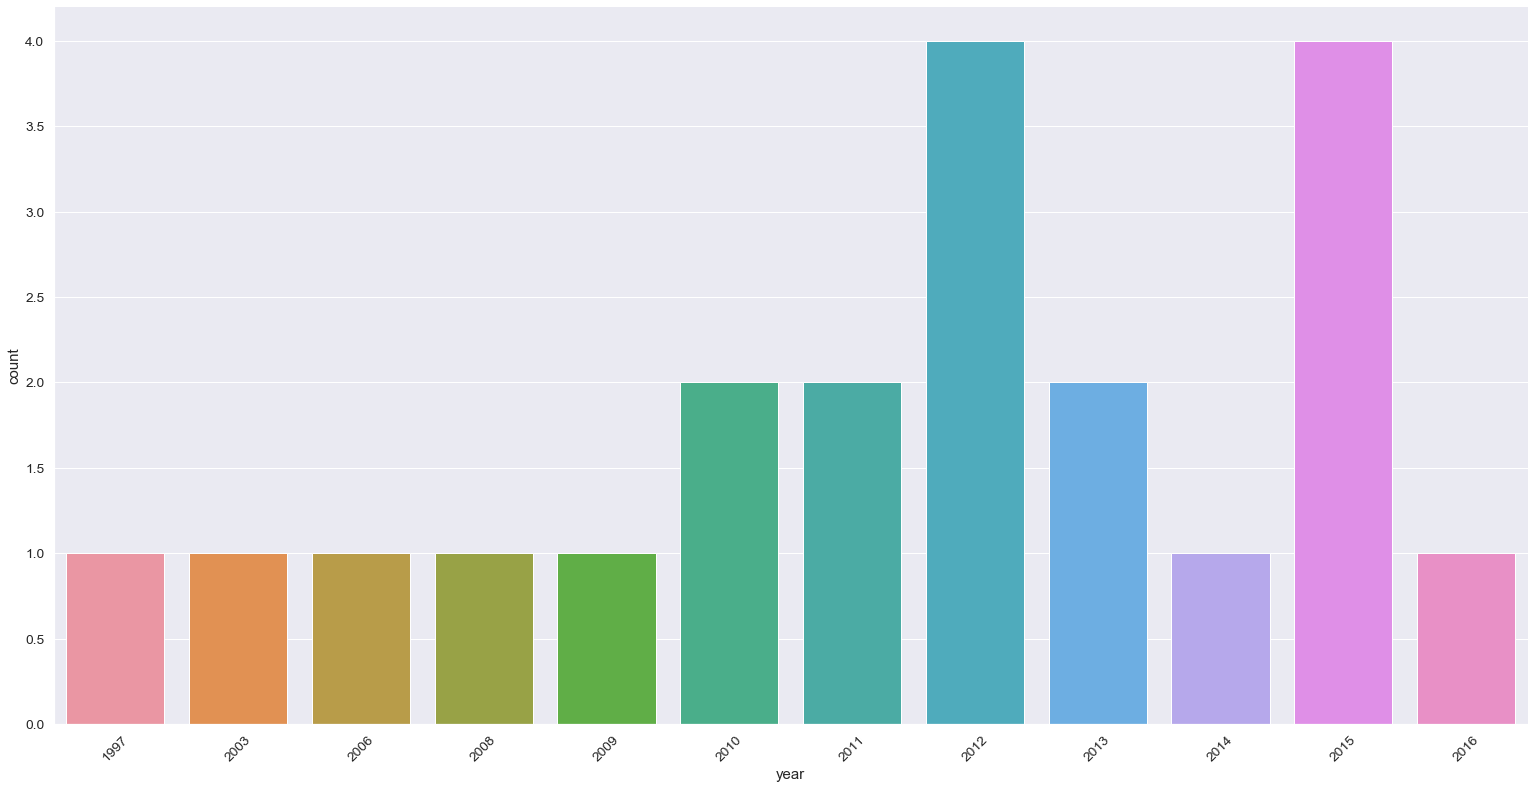

In [29]:
chart=sns.catplot(x="year",data=most_popular_movies_and_return,kind="count")
chart.set_xticklabels(rotation=45)
plt.gcf().set_size_inches(24,12)

In [30]:
df2[df2["vote_count"]>3000][["title","vote_average","vote_count","year"]].sort_values("vote_average",ascending=False).head(10)

,title,vote_average,vote_count,year
1881,The Shawshank Redemption,8.5,8205,1994
3337,The Godfather,8.4,5893,1972
3865,Whiplash,8.3,4254,2014
2294,Spirited Away,8.3,3840,2001
1818,Schindler's List,8.3,4329,1993
3232,Pulp Fiction,8.3,8428,1994
662,Fight Club,8.3,9413,1999
2731,The Godfather: Part II,8.3,3338,1974
809,Forrest Gump,8.2,7927,1994
690,The Green Mile,8.2,4048,1999


In [31]:
df2["genres"]=df2["genres"].fillna('[]').apply(ast.literal_eval).apply(lambda x:[i["name"] for i in x] if isinstance(x,list) else [])

In [32]:
s=df2.apply(lambda x:pd.Series(x["genres"]),axis=1).stack().reset_index(level=1,drop=True)
s.name="genre"

In [33]:
gen_df=df2.drop("genres",axis=1).join(s)
df2.head()

,budget,genres,homepage,id,keywords,original_language,overview,popularity,production_companies,production_countries,...,tagline,title,vote_average,vote_count,tittle,cast,crew,return,year,overvies
0,237000000.0,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",11.763566,2009,"In the 22nd century, a paraplegic Marine is di..."
1,300000000.0,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",3.203333,2007,"Captain Barbossa, long believed to be dead, ha..."
2,245000000.0,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",...,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",3.594590,2015,A cryptic message from Bond’s past sends him o...
3,250000000.0,"[Action, Crime, Drama, Thriller]",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",4.339756,2012,Following the death of District Attorney Harve...
4,260000000.0,"[Action, Adventure, Science Fiction]",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",1.092843,2012,"John Carter is a war-weary, former military ca..."


In [34]:
pop_gen=pd.DataFrame(gen_df["genre"].value_counts()).reset_index()
pop_gen.columns=["genre","movies"]
pop_gen.head(10)

,genre,movies
0,Drama,2297
1,Comedy,1722
2,Thriller,1274
3,Action,1154
4,Romance,894
5,Adventure,790
6,Crime,696
7,Science Fiction,535
8,Horror,519
9,Family,513


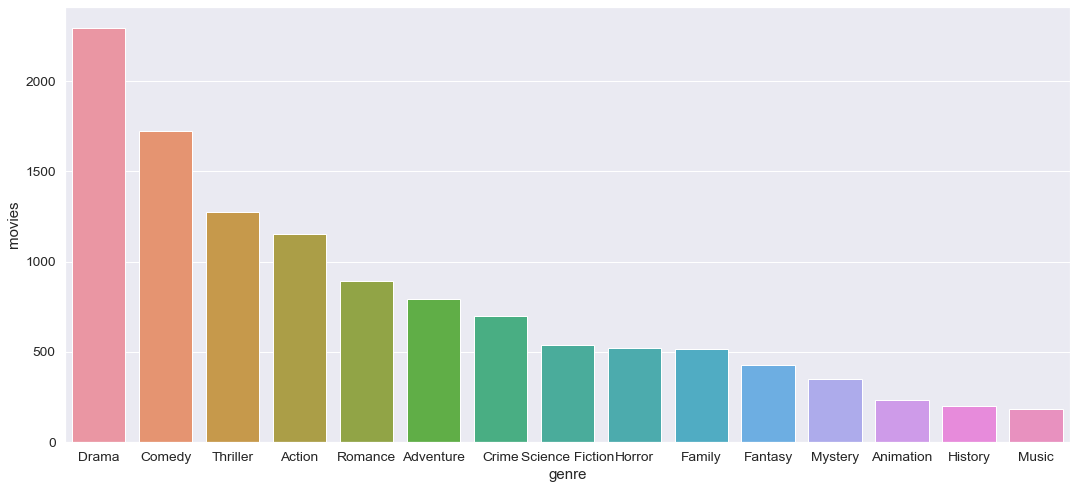

In [35]:
plt.figure(figsize=(18,8))
sns.barplot(x="genre",y="movies",data=pop_gen.head(15))
plt.show()